In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2022-01-21 11:29:41.977091: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ubuntu/catkin_ws/devel/lib:/opt/ros/noetic/lib
2022-01-21 11:29:41.977120: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.6.0


In [4]:
df = pd.read_csv('extended_training_data.csv')

In [5]:
df.tail()

,base_speed,distance_from_wall,rotation_angle,distance_setpoint,docking_time,docking_distance
4495,2.5,531.848167,0.391318,500.0,11.515198,1674.391470
4496,2.5,523.195455,0.390732,500.0,11.465354,1703.937812
4497,2.5,538.721214,0.390282,500.0,11.691364,1713.239634
4498,2.5,535.153784,0.390795,500.0,11.630805,1711.575030
4499,2.5,530.107834,0.387953,500.0,11.744208,1698.880013


In [6]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

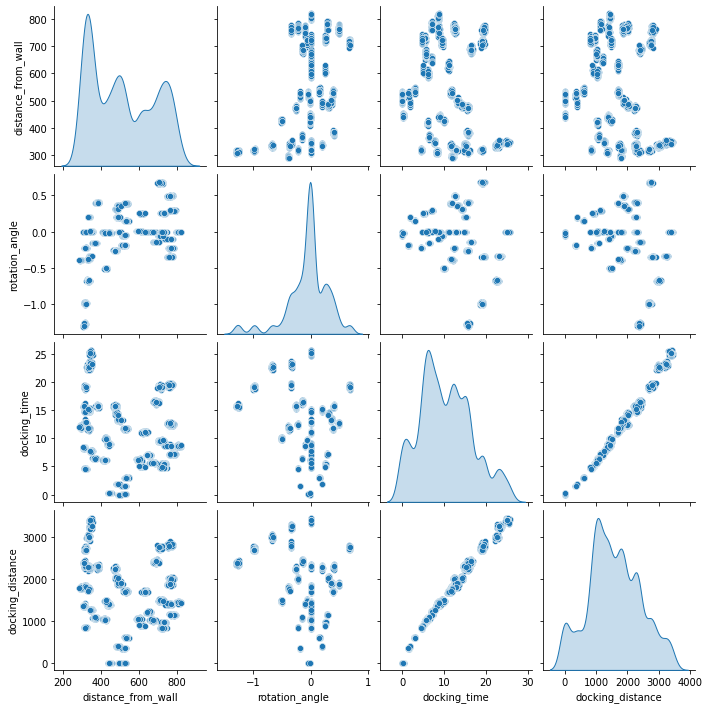

In [7]:
plot=sns.pairplot(train_dataset[[ 
                            # 'base_speed',
                            'distance_from_wall', 
                            'rotation_angle',
                            # 'distance_setpoint', 
                            'docking_time', 
                            'docking_distance']], 
                            diag_kind='kde'
                            )
plt.savefig('output.png')

In [8]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
base_speed,3600.0,2.500000,0.000000,2.500000,2.500000,2.500000,2.500000,2.500000
distance_from_wall,3600.0,512.445866,164.546498,286.976513,344.321811,491.597934,671.739832,820.912826
rotation_angle,3600.0,-0.053640,0.355592,-1.304903,-0.189153,0.000000,0.153388,0.691801
distance_setpoint,3600.0,500.000000,0.000000,500.000000,500.000000,500.000000,500.000000,500.000000
docking_time,3600.0,10.414083,6.193692,0.000585,6.026043,9.547753,14.893725,25.728777
docking_distance,3600.0,1570.180704,830.120669,0.000000,1025.795334,1462.633703,2243.551784,3454.872171


In [9]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('docking_distance')
t=train_features.pop('docking_time')

test_labels = test_features.pop('docking_distance')
t=test_features.pop('docking_time')

In [67]:
train_features

,base_speed,distance_from_wall,rotation_angle,distance_setpoint
854,2.5,712.493222,0.669720,500.0
2560,2.5,313.364074,-0.228212,500.0
2212,2.5,478.538854,-0.261845,500.0
2347,2.5,484.815979,0.201843,500.0
1529,2.5,344.761930,-0.334078,500.0
...,...,...,...,...
1178,2.5,687.955017,-0.142119,500.0
2129,2.5,366.831078,-0.153615,500.0
2532,2.5,316.465797,-0.224896,500.0
397,2.5,673.384589,0.000000,500.0


In [68]:
train_labels

854     2749.664581
2560     854.690988
2212    2245.719676
2347     396.830808
1529    3183.864462
           ...     
1178    2409.393773
2129    1088.111901
2532     822.922639
397     1008.197378
1291    1708.562482
Name: docking_distance, Length: 3600, dtype: float64

In [69]:
test_features

,base_speed,distance_from_wall,rotation_angle,distance_setpoint
0,2.5,317.405327,0.000000,500.0
7,2.5,311.945307,0.000000,500.0
12,2.5,310.614766,0.000000,500.0
21,2.5,309.597484,0.000000,500.0
24,2.5,308.845273,0.000000,500.0
...,...,...,...,...
4480,2.5,536.588567,0.391941,500.0
4481,2.5,536.474226,0.386694,500.0
4487,2.5,526.448464,0.390552,500.0
4497,2.5,538.721214,0.390282,500.0


# Normalization

In [10]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
base_speed,2.500000,0.000000
distance_from_wall,512.445866,164.546498
rotation_angle,-0.053640,0.355592
distance_setpoint,500.000000,0.000000
docking_time,10.414083,6.193692
docking_distance,1570.180704,830.120669


In [11]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [12]:
normalizer.adapt(np.array(train_features))

2022-01-21 11:29:45.496153: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ubuntu/catkin_ws/devel/lib:/opt/ros/noetic/lib
2022-01-21 11:29:45.496186: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-21 11:29:45.496208: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2022-01-21 11:29:45.496531: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-21 11:29:45.541297: I tensorflow/comp

In [13]:
print(normalizer.mean.numpy())

[[  2.5   512.446  -0.054 500.   ]]


# Regression with a deep neural network (DNN)

In [14]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2500])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
  plt.savefig('loss.png', dpi=300)

In [34]:
def build_and_compile(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(256, activation='relu'), 
        layers.Dense(128, activation='relu'), 
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

    return model

## Multiple inputs

In [35]:
dnn_model = build_and_compile(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 4)                 9         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [36]:
%%time

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)

history = dnn_model.fit(
    train_features,
    train_labels,
    callbacks=early_stop,
    validation_split=0.2,
    verbose=0, epochs=1500)

CPU times: user 10min 33s, sys: 1min 2s, total: 11min 36s
Wall time: 5min 58s


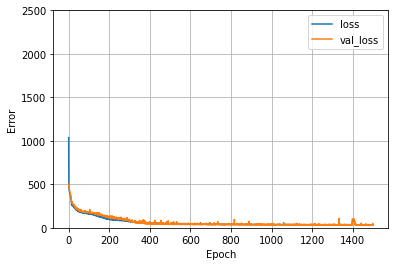

In [37]:
plot_loss(history)

In [38]:
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
print(test_results['dnn_model'])

32.9052734375


# Make predictions

base_speed              2.500000
distance_from_wall    317.405327
rotation_angle          0.000000
distance_setpoint     500.000000
Name: 0, dtype: float64


(array([  1.,   0.,   2.,   6.,  13.,   2.,   0.,   0.,   1.,   2.,   0.,
          0.,   1.,   2.,   6.,  34., 495., 282.,  35.,   5.,   2.,   4.,
          2.,   1.,   0.,   2.,   0.,   0.,   1.,   1.]),
 array([-63.258, -59.495, -55.733, -51.971, -48.209, -44.447, -40.685,
        -36.923, -33.161, -29.399, -25.637, -21.875, -18.113, -14.35 ,
        -10.588,  -6.826,  -3.064,   0.698,   4.46 ,   8.222,  11.984,
         15.746,  19.508,  23.27 ,  27.032,  30.794,  34.557,  38.319,
         42.081,  45.843,  49.605]),
 <BarContainer object of 30 artists>)

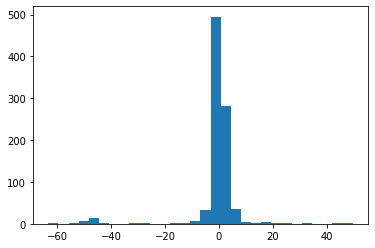

In [58]:
test_predictions = dnn_model.predict(test_features).flatten()

test_predictions = np.array(test_predictions)
test_labels = np.array(list(test_labels))

print(test_features.iloc[0,:])

errors = (test_predictions - test_labels)/10
# print(np.sort(np.absolute(errors)))

plt.hist(errors, bins=30)

In [66]:
test_predictions = dnn_model.predict([100]).flatten()
print(test_predictions)

[1.206e+10]


# Save Model

In [42]:
dnn_model.save('docking_distance_prediction/')

2022-01-21 11:48:40.170943: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: docking_distance_prediction/assets


In [44]:
loaded_model = keras.models.load_model('docking_distance_prediction/')

In [98]:
test_predictions = dnn_model.predict([2.5,311.945307,0.0,500.0]).flatten()
print(test_predictions)
print(test_features.iloc[1:2,:])

[4.679e+08 3.903e+10 7.865e+08 6.296e+10]
   base_speed  distance_from_wall  rotation_angle  distance_setpoint
7         2.5          311.945307             0.0              500.0
